In [1]:
import pandas as pd
from matplotlib.pyplot import figure, savefig, show, subplots
import os
import math
#dfa = pd.read_csv("./gpt3.5-zeroshot.csv", sep=';')
#print(dfa['Original'].value_counts()['1'])

def aux(param):
    if type(param) == str:
        return int(param)
    if math.isnan(param):
        return param
    return int(param)
    

file_tag = 'scores'
dic = {}
directory = "../"
for file in os.scandir(directory):
    if file.is_file():
        if "csv" in file.name:
            df = pd.read_csv(file.path, sep=';')
            
            df['Original'] = df['Original'].apply(aux)
            
            filtered_df = df[df['Possible to answer'] == 1]
            filtered_df = filtered_df[filtered_df['Score'] != 1]
            
            score_mean = round(filtered_df.loc[:, 'Score'].mean(), 2)
            
            score_std = filtered_df.loc[:, 'Score'].std()
            
            originals = df['Original'].value_counts()[1]
            print(file.name + ":" + str(originals))
            
            original_percentage = round((originals*1)/len(df), 2)
            
            possibles = df['Possible to answer'].value_counts()[1] 
            
            possibles_percentage = round((possibles*1)/len(df), 2)
            #answers = df['Answer'].value_counts()['T']
            
            print(score_mean)
            print(score_std)
            print(original_percentage)
            print(possibles_percentage)
            dic[file.name[:-4]] = {'Score': score_mean, 'ScoreStd': score_std, 'Original Sentences': original_percentage, 'Possible to answer': possibles_percentage}


    QId  Score  Possible to answer  Original Unnamed: 4 Answer
64  64;      1                   1       NaN        NaN      F
gpt3.5-finetuned.csv:7
4.43
0.9220944504547136
0.07
0.89
     QId  Score  Possible to answer  Original                  Unnamed: 4  \
37  131;      1                   1       1.0             non-interesting   
47  141;      1                   1       1.0  spread instead of variance   
82  176;      1                   1       NaN      contradictory sentence   

   Answer  
37      T  
47      F  
82      F  
mistral-zeroshot.csv:45
3.29
1.3590387584562653
0.48
0.83
     QId  Score  Possible to answer  Original Unnamed: 4 Answer
78  266;      1                   1       NaN        NaN      T
gpt3.5-zeroshot.csv:33
3.84
1.2492421945347751
0.35
0.94
Empty DataFrame
Columns: [QId, Score, Possible to answer, Original, Unnamed: 4, Answer]
Index: []
mistral-finetuned.csv:16
3.46
1.1756677323875253
0.17
0.74
Empty DataFrame
Columns: [QId, Score, Possible to answer, Or

{'Score': [4.43, 3.29, 3.84, 3.46, 4.4]}
[0.9220944504547136, 1.3590387584562653, 1.2492421945347751, 1.1756677323875253, 0.8963307185292357]


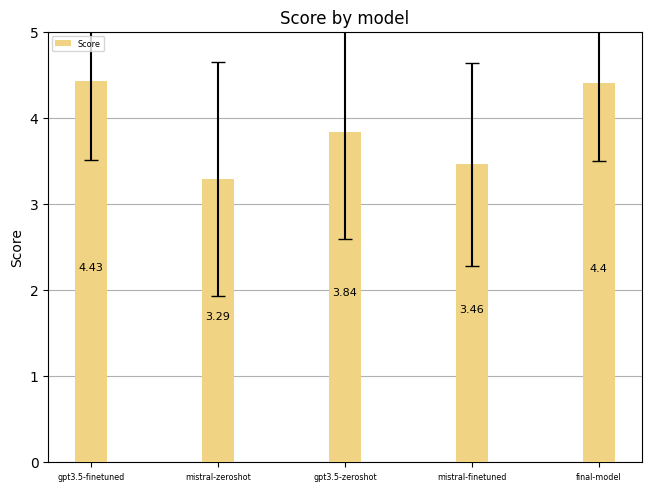

In [3]:
import numpy as np
import matplotlib.pyplot as plt

results = {'Score':[]}#'Original Sentences':[], 'Possible to answer':[]}
stds = []
models = []
   
for key in dic:
    models.append(key)
    results['Score'].append(dic[key]['Score'])
    stds.append(dic[key]['ScoreStd'])
    #results['Original Sentences'].append(round(dic[key]['Original Sentences'],2))
    #results['Possible to answer'].append(round(dic[key]['Possible to answer'],2))
print(results)
print(stds)


x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
multiplier = 1
for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,yerr=stds, capsize=5, color = '#f0d484', zorder=3)
    ax.bar_label(rects, padding=3,fontsize=8, label_type="center")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Score by model')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 5)
ax.tick_params(axis="x", labelrotation=0, labelsize="xx-small")
ax.grid(zorder=0, axis='y')

savefig(f"/home/eduvedras/tese/model/thesisplots/{file_tag}.png", bbox_inches='tight')
show()